1) Delivery_time -> Predict delivery time using sorting time 
Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.
y = Delivery Time
x = Sorting Time

In [35]:
#load the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [77]:
data = pd.read_csv("delivery_time.csv")

In [78]:
data.columns

Index(['Delivery Time', 'Sorting Time'], dtype='object')

In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [80]:
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [81]:
type(data)

pandas.core.frame.DataFrame

In [140]:
data.columns[0]

'Delivery Time'

In [83]:
data.shape

(21, 2)

In [48]:
#data types
data.dtypes

SortingTime    int64
dtype: object

In [84]:
data.iloc[0,:]

Delivery Time    21.0
Sorting Time     10.0
Name: 0, dtype: float64

In [86]:
data['Sorting Time']=pd.to_numeric(data['Sorting Time'],errors='coerce')
data['Delivery Time']=pd.to_numeric(data['Delivery Time'],errors='coerce')

In [89]:
#Count of duplicated rows
data[data.duplicated()].shape

(0, 2)

In [91]:
#Print the duplicated rows
#data[data.duplicated()]

<AxesSubplot:>

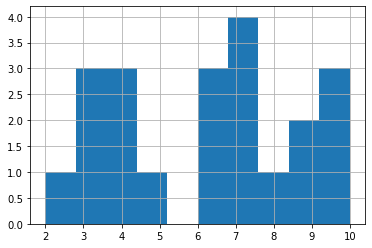

In [92]:
# histogram of
data['Sorting Time'].hist()

<AxesSubplot:>

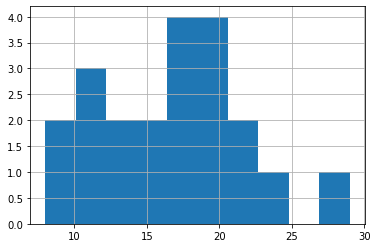

In [93]:
# histogram of 
data['Delivery Time'].hist()

{'whiskers': [<matplotlib.lines.Line2D at 0x7f8c45f5aca0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f8c45f57820>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f8c45f5a6d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f8c464d56a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f8c45f6b040>],
 'means': []}

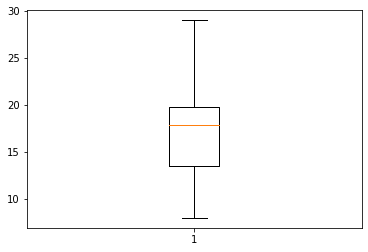

In [95]:
#Box plot

plt.boxplot(data['Delivery Time'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f8c45fb8610>,
 'caps': [<matplotlib.lines.Line2D at 0x7f8c45fb8b20>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f8c45fb8190>],
 'medians': [<matplotlib.lines.Line2D at 0x7f8c45fb3af0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f8c45fb38e0>],
 'means': []}

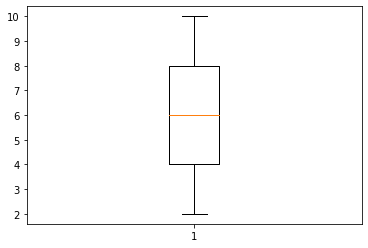

In [96]:
#Box plot

plt.boxplot(data['Sorting Time'])

<AxesSubplot:>

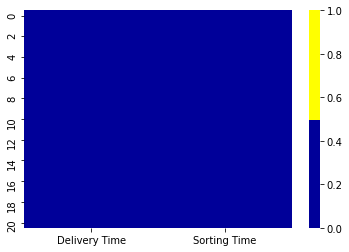

In [99]:
import seaborn as sns
cols = data.columns 
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(data[cols].isnull(),
            cmap=sns.color_palette(colours), vmin=0, vmax=1)

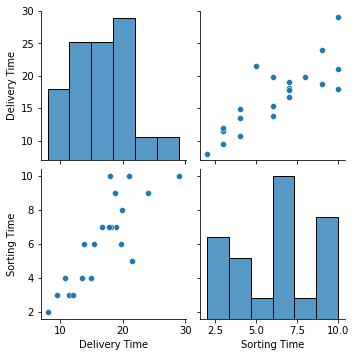

In [100]:
# Seaborn visualization library
import seaborn as sns
# Create the default pairplot
sns.pairplot(data)

In [102]:
#Correlation
data.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


In [104]:
#Normalization of the data
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler

In [105]:
data.values

array([[21.  , 10.  ],
       [13.5 ,  4.  ],
       [19.75,  6.  ],
       [24.  ,  9.  ],
       [29.  , 10.  ],
       [15.35,  6.  ],
       [19.  ,  7.  ],
       [ 9.5 ,  3.  ],
       [17.9 , 10.  ],
       [18.75,  9.  ],
       [19.83,  8.  ],
       [10.75,  4.  ],
       [16.68,  7.  ],
       [11.5 ,  3.  ],
       [12.03,  3.  ],
       [14.88,  4.  ],
       [13.75,  6.  ],
       [18.11,  7.  ],
       [ 8.  ,  2.  ],
       [17.83,  7.  ],
       [21.5 ,  5.  ]])

In [107]:
array = data.values

scaler = MinMaxScaler(feature_range=(0,1))
rescaledX = scaler.fit_transform(array)

#transformed data
set_printoptions(precision=2)
print(rescaledX[0:5,:])


[[0.62 1.  ]
 [0.26 0.25]
 [0.56 0.5 ]
 [0.76 0.88]
 [1.   1.  ]]


In [108]:
!pip install pandas-profiling==2.7.1
!pip install sweetviz

In [112]:
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [113]:
import pandas_profiling as pp
import sweetviz as sv

In [116]:
EDA_report= pp.ProfileReport(data)
EDA_report.to_file(output_file='report.html')

/home/sachin/anaconda3/lib/python3.8/site-packages/pandas_profiling/visualisation/plot.py:166: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("RdBu"))
  cmap.set_bad(cmap_bad)


In [117]:
sweet_report = sv.analyze(data)
sweet_report.show_html('delivery_sorting.html')


Report delivery_sorting.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [149]:

data1 = data.rename({'Delivery Time': 'DT'}, axis=1)
data1 = data.rename({'Sorting Time': 'ST'}, axis=1)

In [150]:
data1.head()

,DT,ST
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [151]:
import statsmodels.formula.api as smf
model = smf.ols("DT~ST",data = data1).fit()   #AT = y, Waist= x

<AxesSubplot:xlabel='ST', ylabel='DT'>

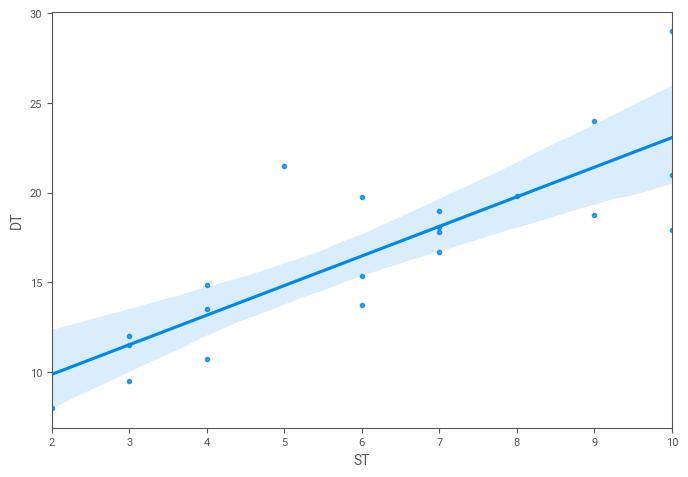

In [160]:
#ST, DT= pd.Series(data.ST, name="Sorting Time"), pd.Series(data.DT, name="Delivery Time")
sns.regplot(x="ST", y="DT", data=data)

In [161]:
#Coefficients
model.params

Intercept    6.582734
ST           1.649020
dtype: float64

In [125]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)    #pvlaues< 5% to accept the model

Intercept               3.823349
data['Sorting Time']    6.387447
dtype: float64 
 Intercept               0.001147
data['Sorting Time']    0.000004
dtype: float64


In [126]:
#R squared values
(model.rsquared,model.rsquared_adj)


(0.6822714748417231, 0.6655489208860244)

In [127]:
#Predict for sorting time 
newdata=pd.Series([5.2, 8.5, 9.5])

In [128]:
newdata

0    5.2
1    8.5
2    9.5
dtype: float64

In [163]:
data_pred=pd.DataFrame(newdata,columns=['ST'])

In [164]:
data_pred

,ST
0,5.2
1,8.5
2,9.5


In [165]:
model.predict(data_pred)

0    15.157637
1    20.599403
2    22.248423
dtype: float64